# Overview

In this notebook we will go over basic examples for how to use Squidward for gaussian process (GP) regression. This is not a tutorial on how works or should be done; it is merely an example of how to use Squidward for regression. Please do not use this tutorial as a recommended workflow for machine learning best practices when building a model in production.

We'll begin by importing the packages needed to go through these examples!

In [1]:
# Model with Squidward
from squidward import gpr, kernels, validation, gp_viz

# Generate example data
import numpy as np

# Plot example data
import matplotlib.pyplot as plt
import seaborn as sns

### 1D Regression Example

We begin with a very simple one dimensional regression example. Here we generate a simple 1D train set, fit a GP to that data, and display the mean and variance of our predictions in an easy to interpret plot.

In [2]:
# Generate noisy samples for dataset
samples = 100

# train data
x_train = np.random.uniform(-15,15,samples)
noise = np.random.normal(0,350,samples)
y_train = (1-x_train)**3-(1-x_train)**2+100+noise

# test data
x_test = np.random.uniform(-15,15,samples)
noise = np.random.normal(0,350,samples)
y_test = (1-x_test)**3-(1-x_test)**2+100+noise

# Generate noiseless data to plot true mean
x_true = np.linspace(-15,15,1000)
y_true = (1-x_true)**3-(1-x_true)**2+100

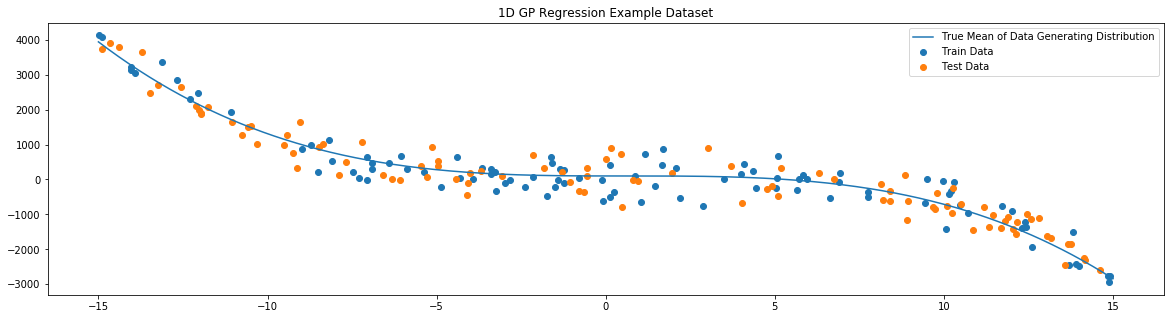

In [3]:
# plot example dataset
plt.figure(figsize=(20,5))
plt.title('1D GP Regression Example Dataset')
plt.scatter(x_train,y_train,label='Train Data')
plt.scatter(x_test,y_test,label='Test Data')
plt.plot(x_true,y_true,label='True Mean of Data Generating Distribution')
plt.legend()
plt.show()

In [4]:
# Create and Fit the gaussian process model
kernel = kernels.rbf(1000**2,5.0)
model = gpr.gaussian_process(kernel=kernel,var_l=1050**2,inv_method='solve')
model.fit(x_train,y_train)

/anaconda3/envs/base_env/lib/python3.6/site-packages/squidward/gpr.py:43: UserWarning: Covariance of low rank. Matrix might not be invertible.
  warnings.warn('Covariance of low rank. Matrix might not be invertible.')


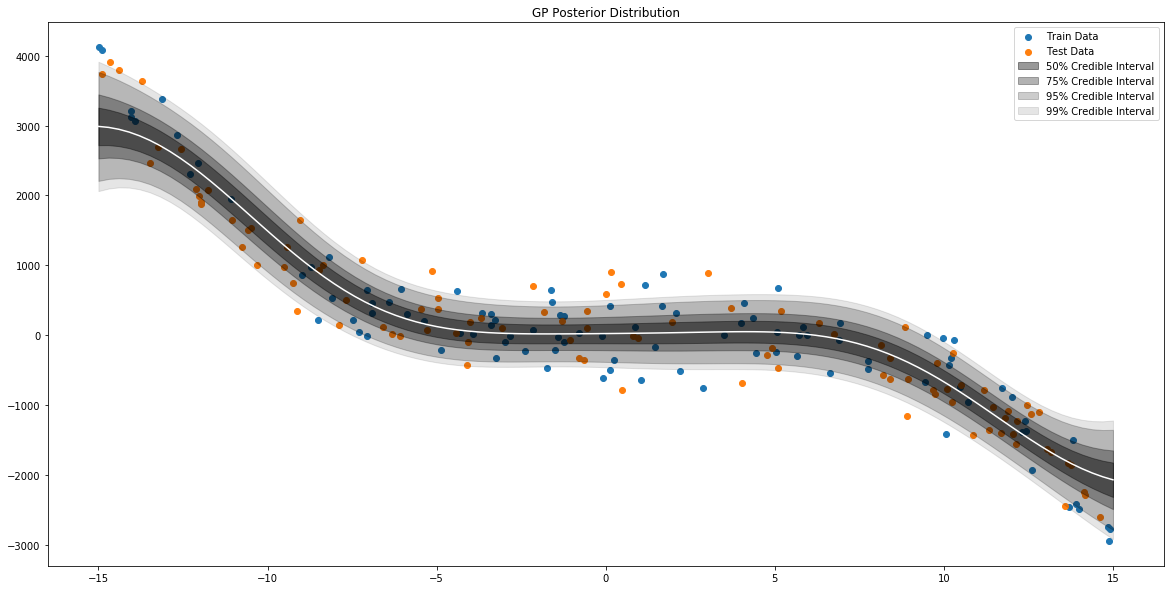

In [5]:
# Generate data to plot posterior of GP
x = np.linspace(-15,15,100)
mean, var = model.posterior_predict(x)

# Plot Posterior of GP
plt.figure(figsize=(20,10))
plt.title("GP Posterior Distribution")
plt.scatter(x_train,y_train,label='Train Data')
plt.scatter(x_test,y_test,label='Test Data')
gp_viz.regression.plot_1d(x,mean,var[:,0])
plt.legend()
plt.show()

In [6]:
# Do basic regression validation

mean, var = model.posterior_predict(x_train)
train_acc = validation.rmse(mean,y_train)

mean, var = model.posterior_predict(x_test)
test_acc = validation.rmse(mean,y_test)

print("Train RMSE: {}\nTest RMSE: {}".format(train_acc,test_acc))

mean, cov = model.posterior_predict(x_train,return_cov=True)
train_ll = validation.likelihood(mean,cov,y_train,log=True,allow_singular=True)

mean, cov = model.posterior_predict(x_test,return_cov=True)
test_ll = validation.likelihood(mean,cov,y_test,log=True,allow_singular=True)

print("Train Log-Likelihood: {}\nTest Log-Likelihood: {}".format(train_ll,test_ll))

Train RMSE: 16975.96473447811
Test RMSE: 18479.336650264482
Train Log-Likelihood: -181695870.44960546
Test Log-Likelihood: -40686893.070378765


/anaconda3/envs/base_env/lib/python3.6/site-packages/squidward/gpr.py:43: UserWarning: Covariance of low rank. Matrix might not be invertible.
  warnings.warn('Covariance of low rank. Matrix might not be invertible.')


## 2D Regression Example

In [7]:
samples = (500,2)
x = np.random.uniform(-10,10,samples)
noise = np.random.normal(0,1000,samples[0])
y = (1-x[:,0])**3-(1-x[:,0])**2-50*(x[:,1])**2+noise

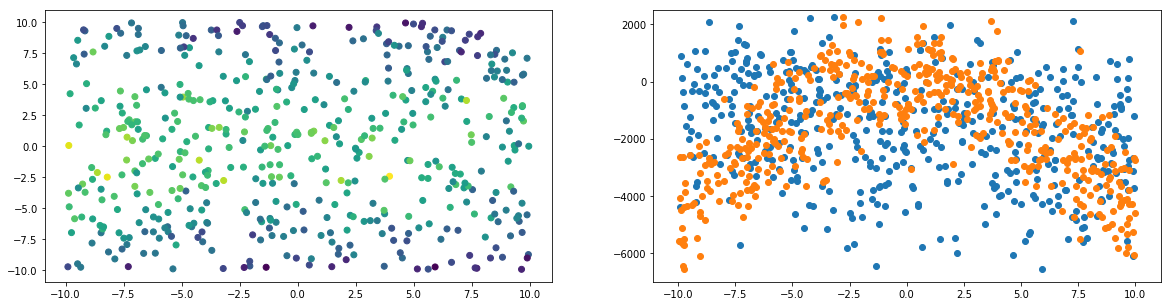

In [8]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(x[:,0],x[:,1],c=y)
plt.subplot(1,2,2)
plt.scatter(x[:,0],y)
plt.scatter(x[:,1],y)
plt.ylim(-7000,2500)
plt.show()

In [9]:
kernel = kernels.rbf(50**2,10.0)
model = gpr.gaussian_process(kernel=kernel,var_l=500**2,inv_method='inv')
model.fit(x,y)
x_test = np.mgrid[-10:10:1.0,-10:10:1.0].reshape(2,-1).T
mean, var = model.posterior_predict(x_test)

/anaconda3/envs/base_env/lib/python3.6/site-packages/squidward/gpr.py:43: UserWarning: Covariance of low rank. Matrix might not be invertible.
  warnings.warn('Covariance of low rank. Matrix might not be invertible.')


/anaconda3/envs/base_env/lib/python3.6/site-packages/squidward/gpr.py:43: UserWarning: Covariance of low rank. Matrix might not be invertible.
  warnings.warn('Covariance of low rank. Matrix might not be invertible.')


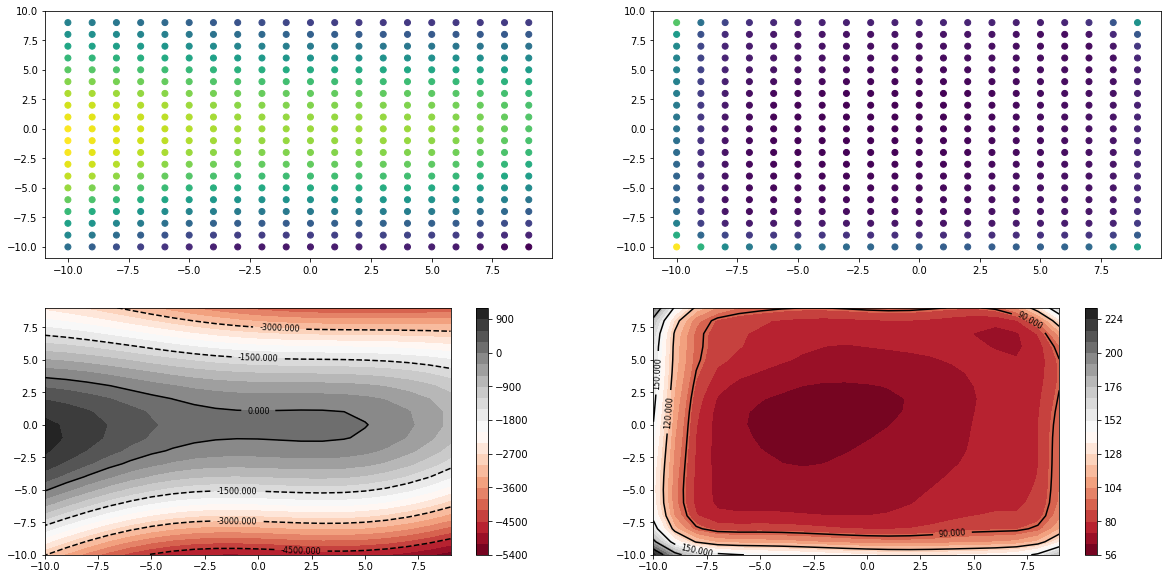

In [10]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
gp_viz.regression.point_grid(model,(-10,10,1))
plt.subplot(2,2,2)
gp_viz.regression.point_grid(model,(-10,10,1),True)
plt.subplot(2,2,3)
gp_viz.regression.contour(model,(-10,10,1))
plt.subplot(2,2,4)
gp_viz.regression.contour(model,(-10,10,1),True)
plt.show()

/anaconda3/envs/base_env/lib/python3.6/site-packages/squidward/gpr.py:43: UserWarning: Covariance of low rank. Matrix might not be invertible.
  warnings.warn('Covariance of low rank. Matrix might not be invertible.')
/anaconda3/envs/base_env/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'lw'
  s)


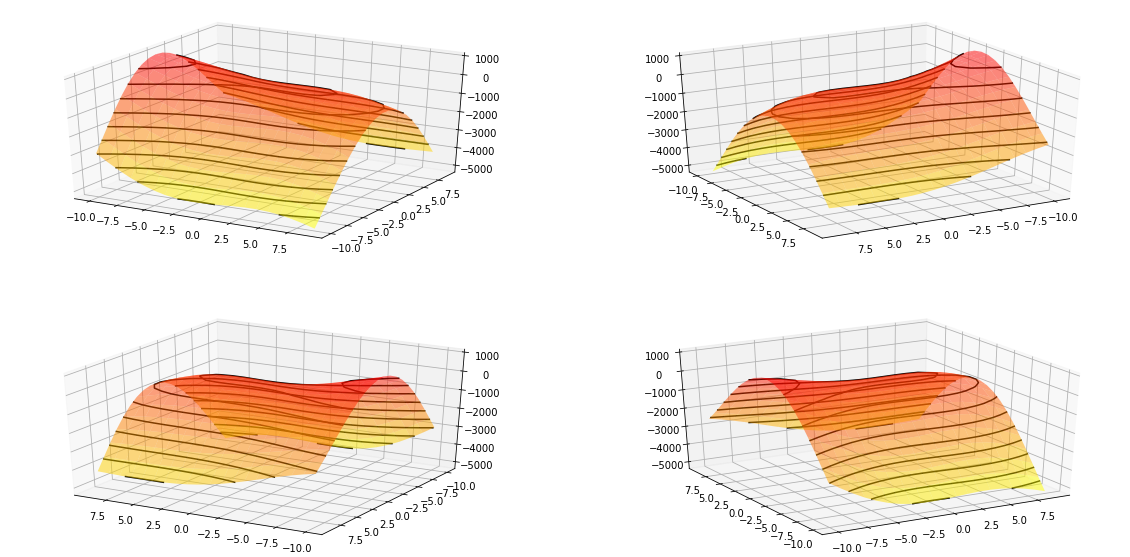

In [11]:
gp_viz.regression.plot_3d(model,(-10,10,1))
plt.show()

/anaconda3/envs/base_env/lib/python3.6/site-packages/squidward/gpr.py:43: UserWarning: Covariance of low rank. Matrix might not be invertible.
  warnings.warn('Covariance of low rank. Matrix might not be invertible.')
/anaconda3/envs/base_env/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'lw'
  s)


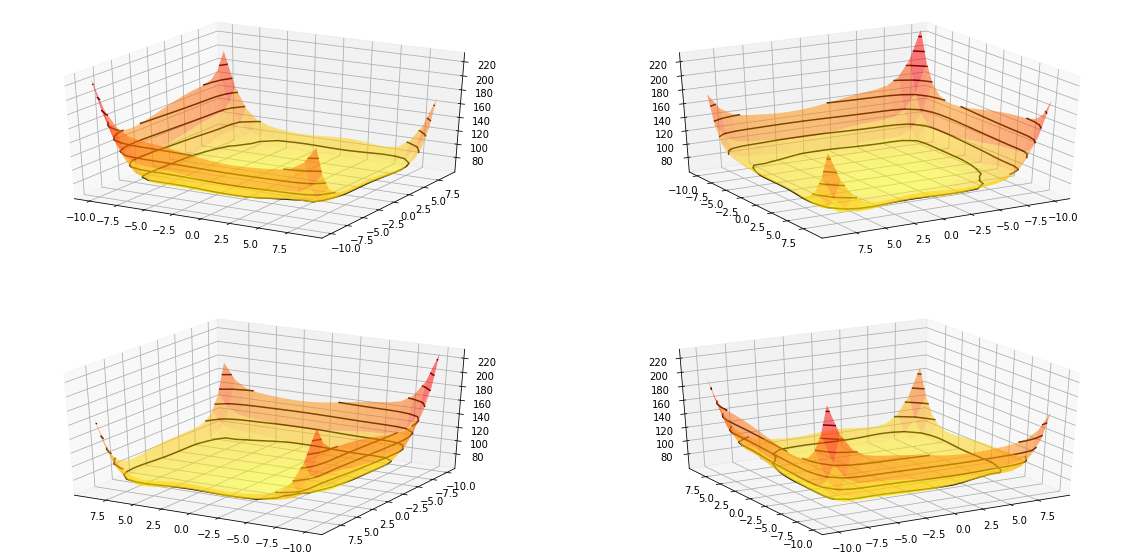

In [12]:
gp_viz.regression.plot_3d(model,(-10,10,1),True)
plt.show()